Here is what I want you to do:
(1) Import in python as pandas dataframe 
(2) There are some rows with missing data, remove all those rows 
(3) Find mean, median, mode etc of each columns 
(4) Make boxplots, scattermatrix plot etc of columns of your choice. However make sure it makes sense.
(5) Do a linear fit and display equations in the graph for columns of your choice.

Remember, I am letting you choose the columns.
You can do whatever you like but at the end you should explain why you chose those column 
and what the result means.
I forgot histograms, draw histogram plots as well. you choose columns!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

## Reading Data 

In [2]:
data=pd.read_csv('Chamorro-Premuzic.txt',delimiter='\t',na_values=' ') #detect missing values as ' ' with na_values
data.info()
#Data has many missing entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 12 columns):
Age         404 non-null float64
Gender      424 non-null object
studentN    420 non-null float64
studentE    418 non-null float64
studentO    418 non-null float64
studentA    413 non-null float64
studentC    416 non-null float64
lectureN    417 non-null float64
lecturE     283 non-null float64
lecturO     420 non-null float64
lecturA     417 non-null float64
lecturC     417 non-null float64
dtypes: float64(11), object(1)
memory usage: 40.4+ KB


## Filter out NA values

In [3]:
# Drop all rows with any cells having NA values
data=data.dropna(axis=0, how='any')

In [4]:
data.info()
#Now we have 265 non-null entries each in all columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 140 to 429
Data columns (total 12 columns):
Age         265 non-null float64
Gender      265 non-null object
studentN    265 non-null float64
studentE    265 non-null float64
studentO    265 non-null float64
studentA    265 non-null float64
studentC    265 non-null float64
lectureN    265 non-null float64
lecturE     265 non-null float64
lecturO     265 non-null float64
lecturA     265 non-null float64
lecturC     265 non-null float64
dtypes: float64(11), object(1)
memory usage: 26.9+ KB


In [5]:
# Original data has float entries for numerical columns, if we need int entries:

#Uncomment the block
#col_names = data.columns
#types_dict = {'Gender': str}
#types_dict.update({col: int for col in col_names if col not in types_dict})
#data=data.astype(types_dict)
#data.info()

#Another method:
#data.loc[:, data.columns != 'Gender']= data.loc[:, data.columns != 'Gender'].astype('int')
#data.info()

## DataSet Survey

In [6]:
print("The dimensions of the dataset are:",data.shape)
print("The index of the dataset is:",data.index)

The dimensions of the dataset are: (265, 12)
The index of the dataset is: Int64Index([140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
            ...
            419, 420, 421, 423, 424, 425, 426, 427, 428, 429],
           dtype='int64', length=265)


In [7]:
print("The columns of the dataset are:",data.columns)

The columns of the dataset are: Index(['Age', 'Gender', 'studentN', 'studentE', 'studentO', 'studentA',
       'studentC', 'lectureN', 'lecturE', 'lecturO', 'lecturA', 'lecturC'],
      dtype='object')


In [8]:
print("Head of dataset")
data.head(5)

Head of dataset


,Age,Gender,studentN,studentE,studentO,studentA,studentC,lectureN,lecturE,lecturO,lecturA,lecturC
140,18.0,Female,28.0,19.0,21.0,48.0,35.0,-29.0,16.0,-7.0,10.0,23.0
141,19.0,Female,20.0,28.0,32.0,46.0,28.0,-10.0,21.0,17.0,26.0,25.0
142,18.0,Female,34.0,22.0,28.0,25.0,7.0,-6.0,3.0,-1.0,1.0,10.0
143,24.0,Female,20.0,32.0,32.0,44.0,27.0,-18.0,8.0,6.0,5.0,18.0
144,18.0,Female,29.0,17.0,31.0,52.0,27.0,-25.0,20.0,8.0,-2.0,20.0


In [9]:
print("Tail of dataset")
data.tail(5)

Tail of dataset


,Age,Gender,studentN,studentE,studentO,studentA,studentC,lectureN,lecturE,lecturO,lecturA,lecturC
425,20.0,Male,23.0,31.0,21.0,51.0,29.0,-25.0,19.0,17.0,18.0,24.0
426,22.0,Female,24.0,26.0,23.0,59.0,24.0,0.0,13.0,8.0,12.0,22.0
427,19.0,Male,18.0,21.0,36.0,44.0,26.0,-12.0,11.0,1.0,7.0,8.0
428,22.0,Male,40.0,32.0,29.0,73.0,24.0,-18.0,26.0,16.0,19.0,27.0
429,19.0,Female,10.0,37.0,43.0,62.0,39.0,-23.0,16.0,20.0,-4.0,22.0


## Descriptive statistics of columns

In [10]:
data.describe()

,Age,studentN,studentE,studentO,studentA,studentC,lectureN,lecturE,lecturO,lecturA,lecturC
count,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.00000,265.000000,265.000000,265.000000
mean,20.237736,23.713208,29.547170,28.969811,45.716981,29.618868,-21.558491,12.90566,8.018868,7.630189,16.879245
std,3.783949,8.640155,6.640002,6.164954,7.635090,6.888315,9.612441,6.73037,8.034232,9.523448,7.676740
min,2.000000,0.000000,5.000000,14.000000,25.000000,7.000000,-30.000000,-5.00000,-15.000000,-19.000000,-8.000000
25%,18.000000,19.000000,26.000000,24.000000,41.000000,25.000000,-29.000000,8.00000,3.000000,1.000000,12.000000
50%,19.000000,24.000000,30.000000,29.000000,46.000000,30.000000,-24.000000,13.00000,8.000000,7.000000,17.000000
75%,20.000000,29.000000,34.000000,33.000000,51.000000,35.000000,-18.000000,17.00000,14.000000,14.000000,23.000000
max,43.000000,44.000000,46.000000,44.000000,73.000000,45.000000,25.000000,28.00000,30.000000,29.000000,30.000000


In [11]:
# Mode of columns
print("Modes of columns")
data.mode(numeric_only=False).loc[0,:]   
#set numeric_only=True to obtain modes of only numerical columns

Modes of columns


Age             19
Gender      Female
studentN        24
studentE        33
studentO        28
studentA        47
studentC        31
lectureN       -30
lecturE         10
lecturO          8
lecturA          4
lecturC         16
Name: 0, dtype: object

In [37]:
normalized_data=data.copy(deep=True)
for col in data.columns:
    if normalized_data.dtypes[col]==float and col!='Age':
        normalized_data[col]=(data[col]-data[col].mean())/data[col].std()
normalized_data.head(5)

,Age,Gender,studentN,studentE,studentO,studentA,studentC,lectureN,lecturE,lecturO,lecturA,lecturC
140,18.0,Female,0.496148,-1.588429,-1.292761,0.299017,0.781197,-0.774154,0.459758,-1.869359,0.248840,0.797312
141,19.0,Female,-0.429762,-0.233007,0.491518,0.037068,-0.235017,1.202451,1.202659,1.117858,1.928903,1.057839
142,18.0,Female,1.190580,-1.136622,-0.157310,-2.713391,-3.283658,1.618578,-1.471785,-1.122555,-0.696196,-0.896115
143,24.0,Female,-0.429762,0.369402,0.491518,-0.224880,-0.380190,0.370196,-0.728884,-0.251283,-0.276180,0.145994
144,18.0,Female,0.611886,-1.889634,0.329311,0.822914,-0.380190,-0.358027,1.054079,-0.002348,-1.011208,0.406521


## Graphical Analysis

### Boxplot

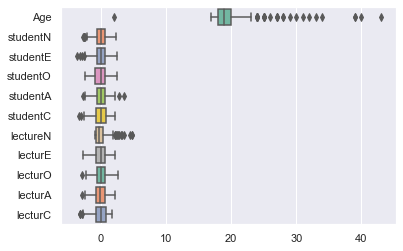

In [38]:
#Boxplot of each numeric variable 
ax = sns.boxplot(data=normalized_data, orient="h", palette="Set2")

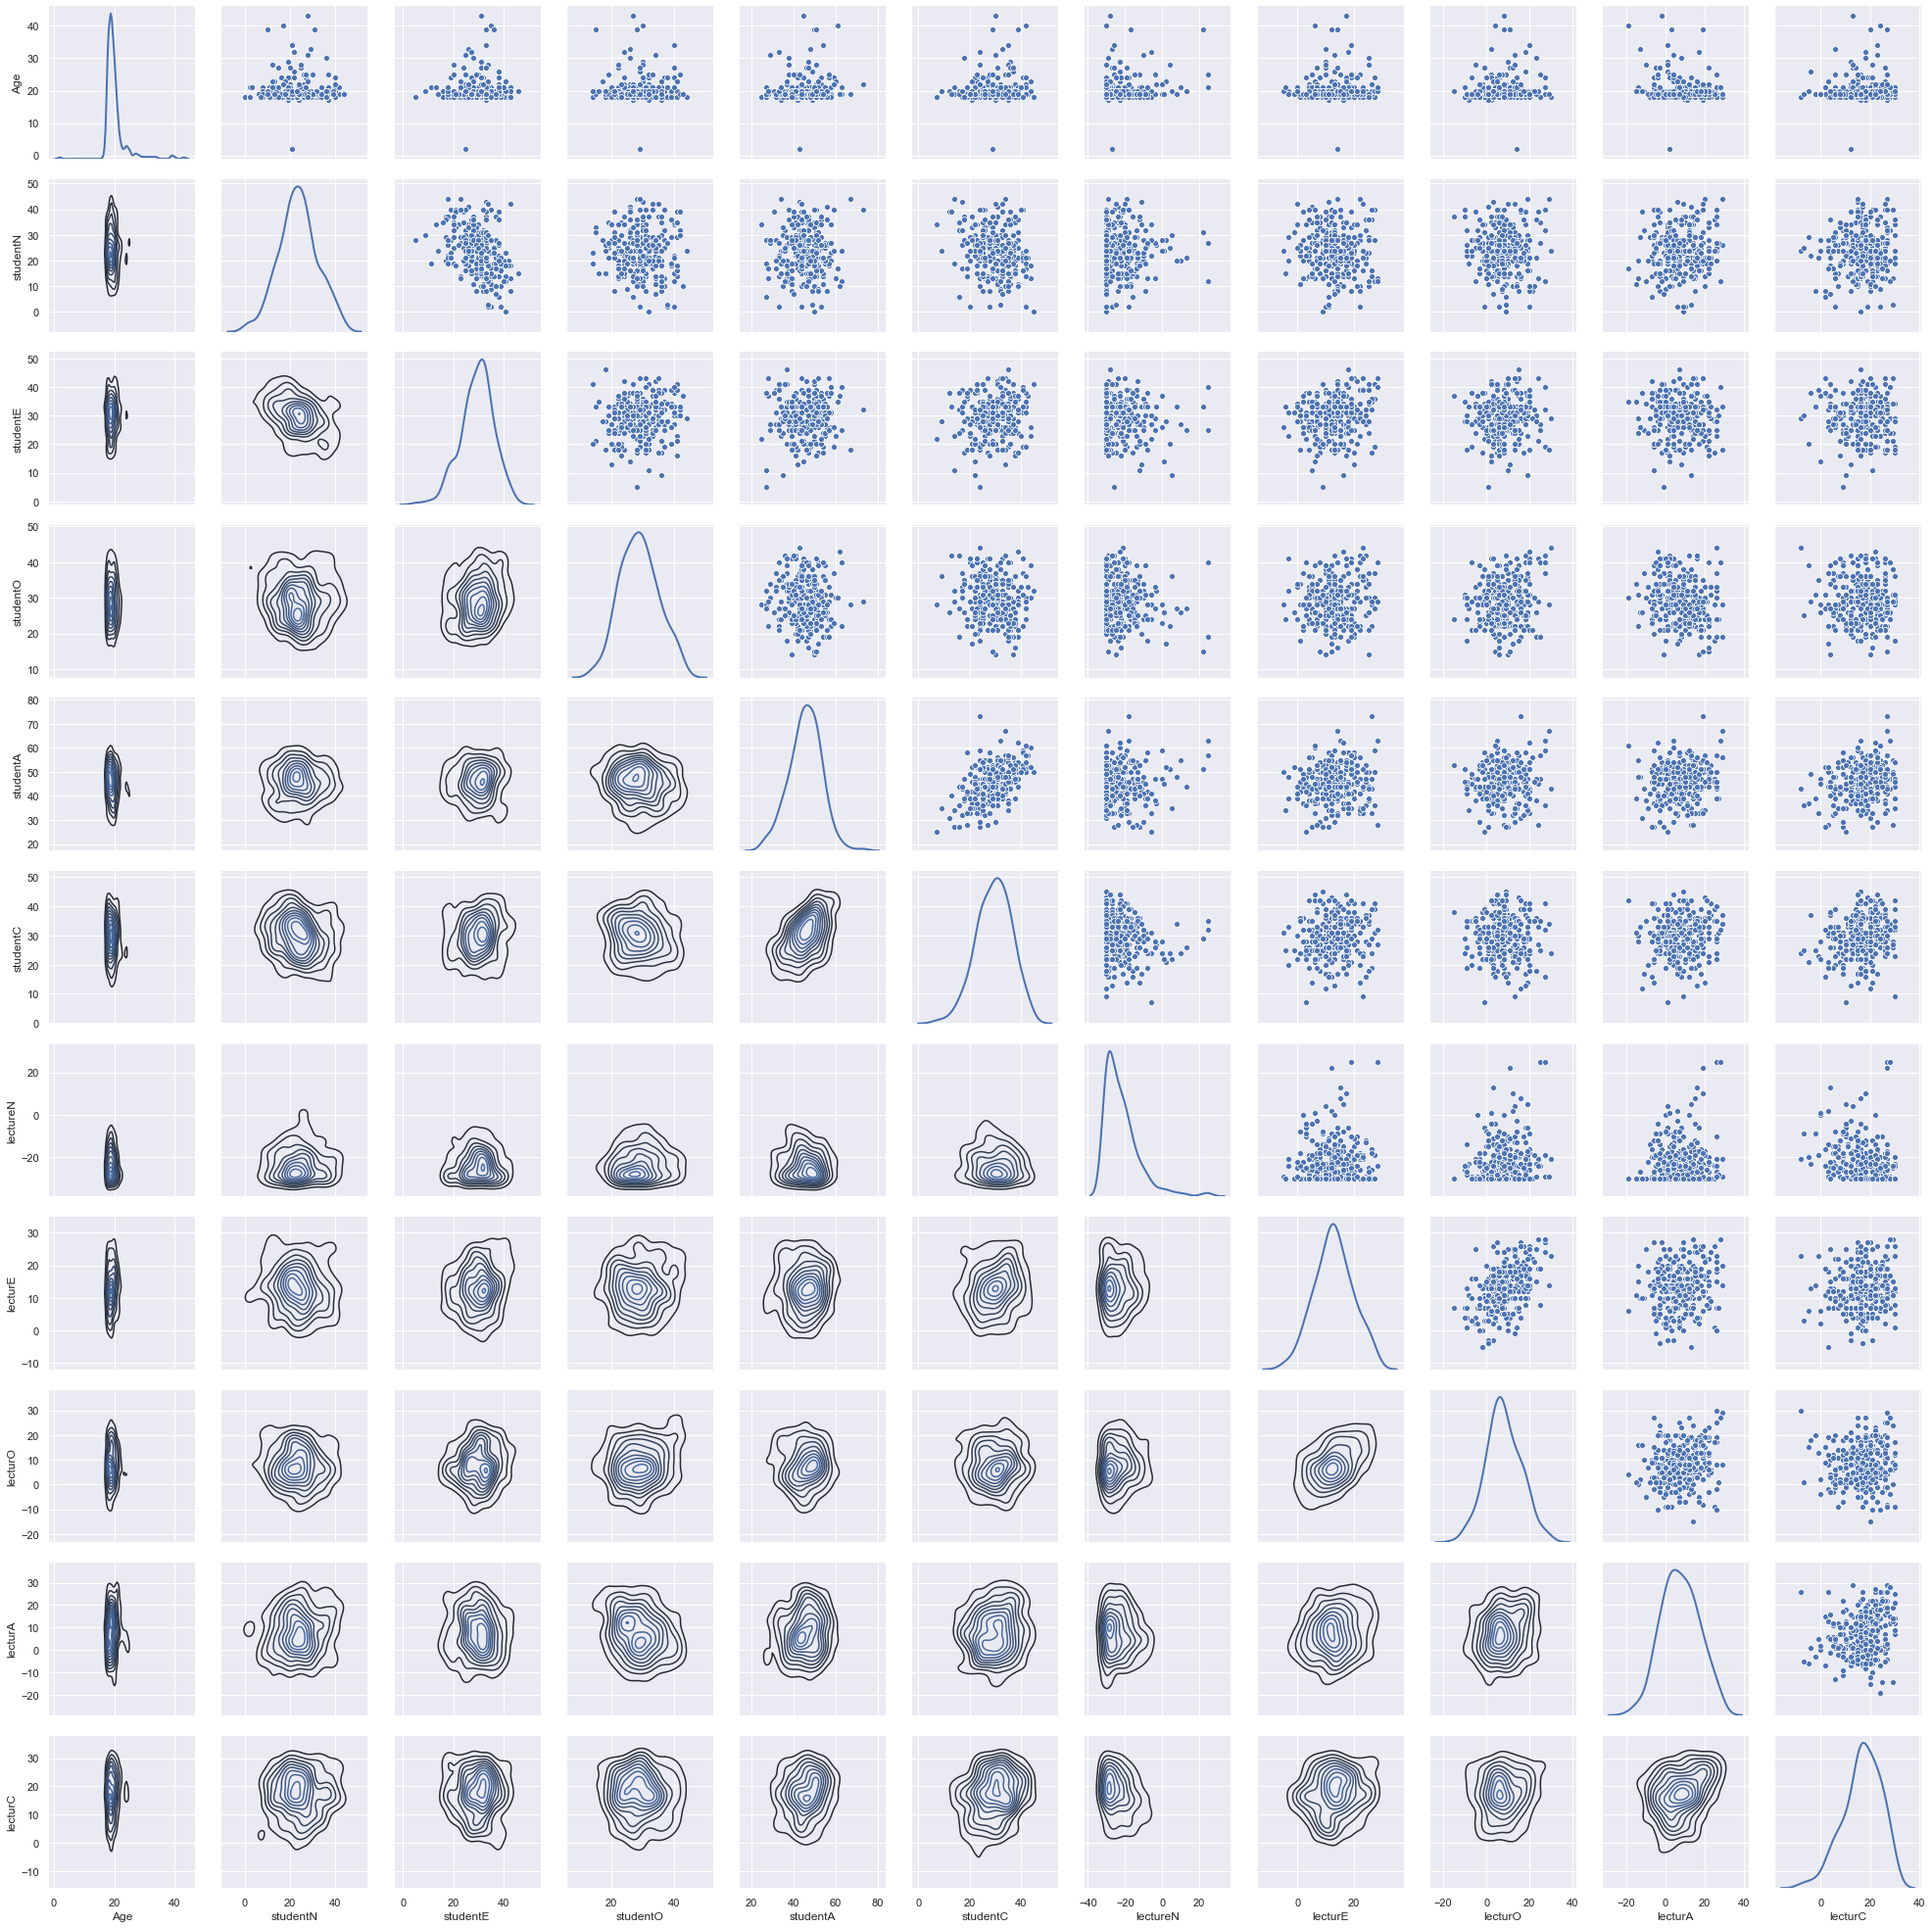

In [36]:
#PairGrid

g = sns.PairGrid(data, diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

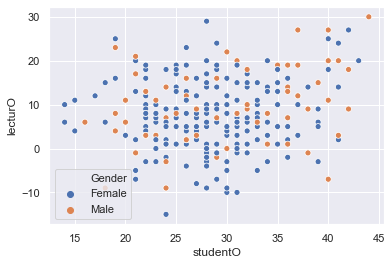

In [42]:
sns.scatterplot(x=data['studentO'],y=data['lecturO'],hue=data['Gender'])